# Cálculos de odometría para robot con tracción diferencial 


## Calculo de radio con velocidades constantes 

Para calcular el radio de la circunferencia trazada por el robot con velocidad lineal y angular constante se pude utilizar la expresión que relaciona el parámetro lineal con el angular mediante el radio. 
$ V = \omega R $ 

In [3]:
v1 = 0.2 
w1 = 0.2 
r = v1/w1 
print("El radio de la circunferencia trazada es", r, "m")


El radio de la circunferencia trazada es 1.0 m


## Calculo de velocidades para un radio determinado 

Para calcular las velocidades del cento odométrico necesarias para describir cierto radio se puede hacer la operación anterior de manera inversa, y se debe tener en cuenta los límites máximos de velocidades. [Especificaciones](https://emanual.robotis.com/docs/en/platform/turtlebot3/features/)

$$ V_{max} = 0.22 \tfrac{m}{s}$$
$$ \omega_{max} = 2.84 \tfrac{rad}{s}$$ 

Eligiendo una de las velocidas arbitrariamente y respetando el límite se puede encontrar la otra que satisfaga la ecuación 


In [4]:
v2 = 0.22  #elegimos la misma que la máxima 
R = 1.5 
r = 0.5 
w = v2/R
w2 = v2/r
print(w, "rad/s")
print(w2, "rad/s")

0.14666666666666667 rad/s
0.44 rad/s


Las velocidades lineales y angulares del centro del robot para lograr el radio elegido de 1.5m es: 
    $$ \boxed{\omega _{OD} = 0.14~\tfrac{rad}{s}} $$
     $$ \boxed{v _{OD} = 0.22~\tfrac{m}{s}} $$

## Calculo de velocidades de las ruedas 

Las velocidades lineales y angulares del centro odométrico se relacionan con las velocidades angulares de las ruedas izquierda y derecha mediante las expresiones: 

$\begin{align}
           \omega_{OD}  &= R \left ( \frac{\omega _R - \omega _L}{b} \right )  \label{ec: velocidad odometrica y angulares de rueda} \\ 
           v_{OD}  &= R \left ( \frac{\omega _R + \omega _L}{2} \right )  \label{ec: velocidad angular y angulares de rueda}  
 \end{align}$ 
 
 
 Las especificaciones mecánicas son: 
 * R = 0.033 m 
 * b = 0.160 m
 

In [5]:
R = 0.033
b = 0.160


Con esto obtenemos un sistema de dos ecuaciones: 

$   \begin{align}
         \omega _R - \omega _L &=  \frac{\omega _{OD}}{R} \cdot b \\ 
         \omega _R + \omega _L &= \frac{v _{OD}}{R} \cdot 2   
     \end{align}
     $ 
     
     
 Resolviendo el sistema de forma matricial: 
 
 $ x = A^{-1}B $ 


In [6]:
import numpy as np
Wod = w 
Vod = v2 
y1 = b * (Wod/R)
y2 = 2 * (Vod/R)

A = np.matrix([[1,-1],[1, 1]])
B = np.matrix([[y1],[y2]])
x = (A**-1)*B
wR = x[0]
wL = x[1]
print(x)


[[7.02222222]
 [6.31111111]]


 La velocidad angular de las ruedas: 
 
 $$\omega _R = 7.022~\tfrac{rad}{s}$$
 
 $$ \omega _L = 6.31~\tfrac{rad}{s}$$ 

 Para el cálculo de las velocidades **lineales** se utiliza la relación entre este parámtro lineal y angular, el **radio** 
 
 

In [7]:
vR = wR*R
vL = wL*R 

print(vR,vL)

[[0.23173333]] [[0.20826667]]


 Las velocidades lineales de las ruedas 
 
  $$\boxed{v_R = 0.2317~\tfrac{m}{s}}$$
 
 $$ \boxed{v_L = 0.208 ~\tfrac{m}{s}}$$ 
 
 

## Registro de datos para robot teleoperado

Una vez lanzado la simulación de TurtleBot3 en Gazebo, y el nodo de teleoperación: ` roslaunch turtlebot3_teleop turtlebot3_teleop_key.launch `  

Desde una nueva terminal se ejecuta el script de python y se redirecciona su salida a un archivo de texto 

` python3 dump_odom.py > log_teleop.txt `

Este script muestra en pantalla 6 columnas con los siguientes datos:
   * tiempo (timestamp), 
   * coordenadas x, 
   * corrodenads y, 
   * orientación, 
   * velocidad lineal y 
   * velocidad angular.


In [43]:
import pandas as pd 
import matplotlib.pylab as plt 

#El separador es un caracter de tab
# 
data = pd.read_csv("./logs/log_teleop.txt", sep= "\t", header=None) 


### Grafico del camino

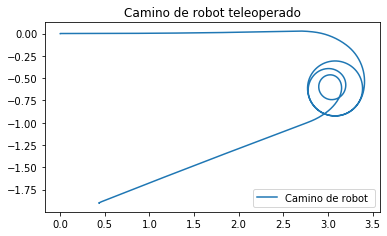

In [44]:
#Elimino los datos que sean nulos (para graficar)

PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]

plt.axes().set_aspect('equal')
plt.title("Camino de robot teleoperado")
plt.plot(PuntosX,PuntosY, label="Camino de robot ")
plt.legend()
plt.savefig('./imgs/camino_teleop.png')

### Grafico de la trayectoria


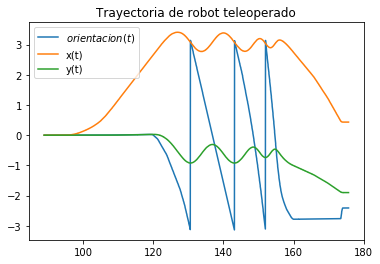

In [45]:
PuntosO = [orientacion for orientacion in data[3] if orientacion != 0]
PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]
PuntosT = [t for t in data[0] if t != 0] 
plt.title("Trayectoria de robot teleoperado")
plt.plot(PuntosT,PuntosO, label ="$ orientacion(t) $")
plt.plot(PuntosT,PuntosX, label ="x(t)")
plt.plot(PuntosT,PuntosY, label ="y(t)")
plt.legend(loc = "upper left")
plt.savefig('./imgs/trayectoria_teleop.png')

2607


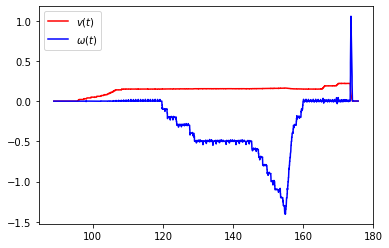

In [46]:
PuntosT = [t for t in data[0] if t != 0] 
PuntosV = [x for x in data[4] if x != 0] 
PuntosW = [y for y in data[5] if y != 0]

print(len(data))

plt.plot(PuntosT,PuntosV, color ='red', label = "$v(t) $")
plt.plot(PuntosT,PuntosW, color ='blue', label = "$\omega (t)$")
plt.legend(loc = "upper left")
plt.savefig('./imgs/velocidades_teleop.png')

### Datos de robot teleoperado  - Alternativa 2 

Para entender mejor las graficas de orientación operamos el robot para que su camino sea una circunferencia


#### Grafico de camino

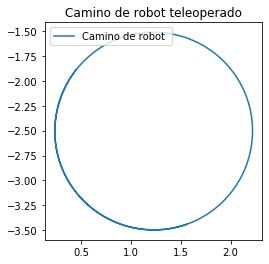

In [49]:
data = pd.read_csv("./logs/log_teleop_v2.txt", sep= "\t", header=None)
PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]

plt.axes().set_aspect('equal')
plt.title("Camino de robot teleoperado")
plt.plot(PuntosX,PuntosY, label="Camino de robot ")
plt.legend(loc="upper left")
plt.savefig('./imgs/camino_teleop_v2.png')

#### Grafico de trayectoria

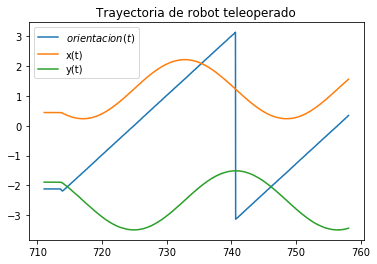

In [30]:
PuntosO = [orientacion for orientacion in data[3] if orientacion != 0]
PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]
PuntosT = [t for t in data[0] if t != 0] 
plt.title("Trayectoria de robot teleoperado")
plt.plot(PuntosT,PuntosO, label ="$ orientacion(t) $")
plt.plot(PuntosT,PuntosX, label ="x(t)")
plt.plot(PuntosT,PuntosY, label ="y(t)")
plt.legend(loc = "upper left")
plt.savefig('./imgs/trayectoria_teleop_v2.png')

#### Gráfico de velocidades




1412


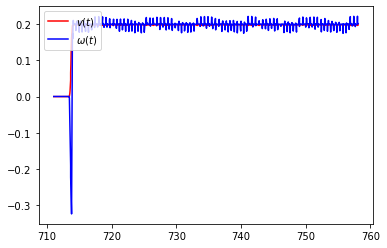

In [50]:
PuntosT = [t for t in data[0] if t != 0] 
PuntosV = [x for x in data[4] if x != 0] 
PuntosW = [y for y in data[5] if y != 0]

print(len(data))

plt.plot(PuntosT,PuntosV, color ='red', label = "$v(t) $")
plt.plot(PuntosT,PuntosW, color ='blue', label = "$\omega (t)$")
plt.legend(loc = "upper left")
plt.savefig('./imgs/velocidades_teleop_v2.png')

## Registro de datos de robot para camino circular 

Una vez lanzado la simulación de TurtleBot3 en Gazebo y publicando las velocidades lineales y angulares para un camino circular

`rostopic pub -1 /cmd_vel geometry_msgs/Twist '[0.2,0,0]' '[0,0,0.2]' `
En una nueva terminal ejecutamos el script y su salida la direccionamos a un archivo de texto 

` python3 dump_odom.py > log_mov_circular.txt ` 

En la primer columna está el tiempo de ejecución. En las dos siguientes coordenadas x,y. 



In [8]:
import pandas as pd 
import matplotlib.pylab as plt 

#El separador es un caracter de tab
#git clone 
data = pd.read_csv("./logs/log_mov_circular.txt", sep= "\t", header=None) 
print("Registro de datos de camino circular")

Registro de datos de camino circular


### Gráfico del camino 


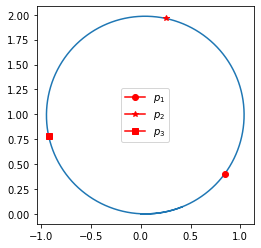

In [33]:
#Elimino los datos que sean nulos (para graficar)

PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]

#Grafico el camino circular con relacion 1:1 

plt.axes().set_aspect('equal')
plt.plot(PuntosX,PuntosY)
plt.savefig('./imgs/camino_circular.png')


"""
plt.annotate('$p_1$', xy=(PuntosX[20],PuntosY[20]),
             xytext =  (PuntosX[20],PuntosY[20] -1),
             size = 15, color = 'red',
            arrowprops={ "arrowstyle": "<->" }) 
"""
#Marco puntos al azar en el grafico del camino 
#Hay muchos datos al principio cuando aun no habíamos enviado 
#el comando de velocidad. Supuestamente, si tienen x e y = 0 
# tendrian que no estar, pero debe ser que no estaba en (0,0) porque 
#ya habíamos ejecutado otra simulación 
D1=500
D2=800
D3=1100
plt.plot(PuntosX[D1],PuntosY[D1], marker = 'o'
         ,color = 'red',label = '$p_1$')
plt.plot(PuntosX[D2],PuntosY[D2], marker = '*'
         ,color = 'red',label = '$p_2$')
plt.plot(PuntosX[D3],PuntosY[D3], marker = 's'
         ,color = 'red',label = '$p_3$')
plt.legend()


plt.savefig('./imgs/camino_circular_anotado.png')


### Gráfica de la trayectoria

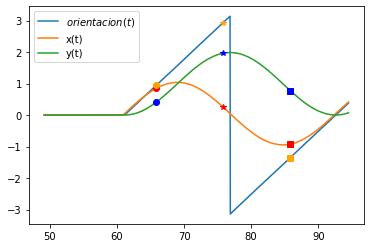

In [34]:
PuntosO = [orientacion for orientacion in data[3] if orientacion != 0]
PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]
PuntosT = [t for t in data[0] if t != 0] 


plt.plot(PuntosT,PuntosO, label ="$ orientacion(t) $")
plt.plot(PuntosT,PuntosX, label ="x(t)")
plt.plot(PuntosT,PuntosY, label ="y(t)")
plt.legend()
plt.savefig('./imgs/trayectoria_circular.png')

#Marco los puntos respectivos 
plt.plot(PuntosT[D1],PuntosX[D1], marker = 'o'
         ,color = 'red',label = '$p_1$')
plt.plot(PuntosT[D2],PuntosX[D2], marker = '*'
         ,color = 'red',label = '$p_2$')
plt.plot(PuntosT[D3],PuntosX[D3], marker = 's'
         ,color = 'red',label = '$p_3$')

plt.plot(PuntosT[D1],PuntosY[D1], marker = 'o'                                  
         ,color = 'blue',label = '$p_1$')                                       
plt.plot(PuntosT[D2],PuntosY[D2], marker = '*'                                  
         ,color = 'blue',label = '$p_2$')                                       
plt.plot(PuntosT[D3],PuntosY[D3], marker = 's'                                  
         ,color = 'blue',label = '$p_3$')                                       
                                                                                 
plt.plot(PuntosT[D1],PuntosO[D1], marker = 'o'                                  
         ,color = 'orange',label = '$p_1$')                                     
plt.plot(PuntosT[D2],PuntosO[D2], marker = '*'                                  
         ,color = 'orange',label = '$p_2$')                                     
plt.plot(PuntosT[D3],PuntosO[D3], marker = 's'                                  
         ,color = 'orange',label = '$p_3$')       

plt.savefig('./imgs/tratyectoria_circular_anotado.png')


### Gráfica de velocidades 

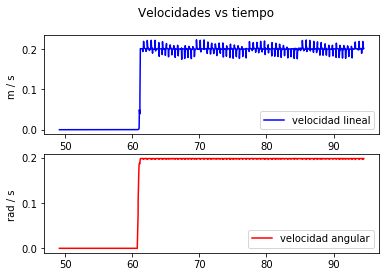

In [62]:
PuntosT = [t for t in data[0] if t != 0] 
PuntosV = [x for x in data[4] if x != 0] 
PuntosW = [y for y in data[5] if y != 0]

plt.suptitle('Velocidades vs tiempo')
plt.subplot(2,1,1)
plt.ylabel('m / s ')
plt.plot(PuntosT,PuntosW, color ='blue', label = 'velocidad lineal')
plt.legend()
plt.subplot(2,1,2)
plt.ylabel('rad / s ')
plt.plot(PuntosT,PuntosV, color ='red', label = 'velocidad angular')
plt.legend()
plt.savefig('./imgs/velocidades_circular_ej4.png')



### Rango de valores


In [63]:
print("Valor MAX Eje X :{0:3.3f}".
      format(max(data[1])))
print("Valor min Eje X :{0:3.3f}".
      format(min(data[1])))
print("Valor MAX Eje Y :{0:3.3f}".
      format(max(data[2])))
print("Valor min Eje Y :{0:3.3f}".
      format(min(data[2])))

print("Valor MAX orientacion :{0:3.3f}".
      format(max(data[3])))
print("Valor min orientaicon :{0:3.3f}".
      format(min(data[3])))


Valor MAX Eje X :1.037
Valor min Eje X :-0.947
Valor MAX Eje Y :1.985
Valor min Eje Y :0.000
Valor MAX orientacion :3.137
Valor min orientaicon :-3.139


## Combinaciones de caminos circulares 

Se prueban caminos circulares con combinaciones de velocidades positivas y negativas, marcando en cada camino el sentido de avance del roboto


### Combinacion 1 

* Velocidad lineal = 0.2
* Velocidad angular =  0.2


`rostopic pub -1 /cmd_vel geometry_msgs/Twist '{linear: {x: 0.2},
angular: {z: 0.2}}' `


Registro de datos de camino circular


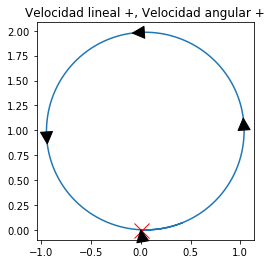

In [20]:
import pandas as pd 
import matplotlib.pylab as plt 
#import matplotlib.patches as pltpat

data = pd.read_csv("./logs/log_mov_circular.txt", sep= "\t", header=None) 
print("Registro de datos de camino circular") 
#Elimino los datos que sean nulos (para graficar)

PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]

#Grafico el camino circular con relacion 1:1 
#plt.axes().set_aspect('equal')
ax1 = plt.gca()
ax1.set_aspect('equal')
plt.plot(PuntosX,PuntosY) 
plt.title("Velocidad lineal +, Velocidad angular +")


#Calculo los 4 puntos de coseno y seno maximo 
puntos = [] 
puntos.append(PuntosX.index(max(PuntosX)))
puntos.append(PuntosX.index(min(PuntosX)))
puntos.append(PuntosY.index(max(PuntosY)))
puntos.append(PuntosY.index(min(PuntosY)))

#Grafico la direccion solo en esos puntos 
#La dirección la grafico como una flecha desde el punto i hasta el 
#punto i+1.

plt.plot(0,0,marker = 'x',color = 'red',markersize = 15)
for indice in puntos: 
 
    plt.annotate('', xy=(PuntosX[indice+20], PuntosY[indice+20]), 
            xytext=(PuntosX[indice], PuntosY[indice]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')


"""
cambio=0 
for i in range(len(PuntosX)):
    if (i%100 == 0):  #Cada 70 puntos 
        xyA =  (PuntosX[i],PuntosY[i])
        xyB = (PuntosX[i+50],PuntosY[i+50])
        coordsA = "data"
        coordsB = "data" 
        con = ConnectionPatch(xyA, xyB, coordsA, coordsB,
                      arrowstyle="-|>", shrinkA=10, shrinkB=10,
                      mutation_scale=30, fc="w")
        ax1.add_artist(con)
    if PuntosX[i] < 0 and PuntosX[i-1] > 0:
        cambio += 1
    if cambio >= 2: 
        print("entro")
        break 
""" 
"""
xyS = (0,0)
for i in range(len(PuntosX)):
    if (i%100 == 0):  
        plt.annotate('', xy=(PuntosX[i], PuntosY[i]), 
            xytext=xyS,arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
        xyS=(PuntosX[i+30], PuntosY[i+30])
        
"""

plt.savefig('./imgs/direccion_camino_circular_1.png')



### Combinacion 2 

* Velocidad lineal = 0.2
* Velocidad angular = - 0.2


`rostopic pub -1 /cmd_vel geometry_msgs/Twist '{linear: {x: 0.2},
angular: {z: -0.2}}' `


Registro de datos de camino circular


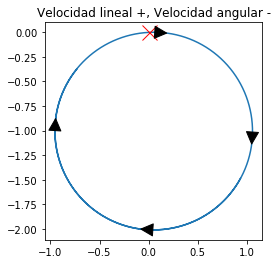

In [17]:
data = pd.read_csv("./logs/comb2_log.txt", sep= "\t", header=None) 
print("Registro de datos de camino circular") 
#Elimino los datos que sean nulos (para graficar)

PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]

#Grafico el camino circular con relacion 1:1 
#plt.axes().set_aspect('equal')
ax1 = plt.gca()
ax1.set_aspect('equal')
plt.plot(PuntosX,PuntosY) 
plt.title("Velocidad lineal +, Velocidad angular -")


#Calculo los 4 puntos de coseno y seno maximo 
puntos = [] 
puntos.append(PuntosX.index(max(PuntosX)))
puntos.append(PuntosX.index(min(PuntosX)))
puntos.append(PuntosY.index(max(PuntosY)))
puntos.append(PuntosY.index(min(PuntosY)))

#Grafico la direccion solo en esos puntos 
#La dirección la grafico como una flecha desde el punto i hasta el 
#punto i+1. 
plt.plot(0,0,marker = 'x',color = 'red',markersize = 15)
for indice in puntos: 
     plt.annotate('', xy=(PuntosX[indice+20], PuntosY[indice+20]), 
            xytext=(PuntosX[indice], PuntosY[indice]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.savefig('./imgs/direccion_camino_circular_2.png')


### Combinacion 3 

* Velocidad lineal = -0.2
* Velocidad angular =  0.2


`rostopic pub -1 /cmd_vel geometry_msgs/Twist '{linear: {x: -0.2},angular: {z: 0.2}}' `


Registro de datos de camino circular - Comb3


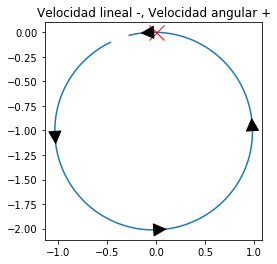

In [16]:
data = pd.read_csv("./logs/comb3_log.txt", sep= "\t", header=None) 
print("Registro de datos de camino circular - Comb3") 
#Elimino los datos que sean nulos (para graficar)

PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]

#Grafico el camino circular con relacion 1:1 
#plt.axes().set_aspect('equal')
ax1 = plt.gca()
ax1.set_aspect('equal')
plt.plot(PuntosX,PuntosY) 
plt.title("Velocidad lineal -, Velocidad angular +")


#Calculo los 4 puntos de coseno y seno maximo 
puntos = [] 
puntos.append(PuntosX.index(max(PuntosX)))
puntos.append(PuntosX.index(min(PuntosX)))
puntos.append(PuntosY.index(max(PuntosY)))
puntos.append(PuntosY.index(min(PuntosY)))

#Grafico la direccion solo en esos puntos 
#La dirección la grafico como una flecha desde el punto i hasta el 
#punto i+1. 
plt.plot(0,0,marker = 'x',color = 'red',markersize = 15)
for indice in puntos: 
     plt.annotate('', xy=(PuntosX[indice+20], PuntosY[indice+20]), 
            xytext=(PuntosX[indice], PuntosY[indice]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.savefig('./imgs/direccion_camino_circular_3.png')


### Combinacion 4 

* Velocidad lineal = -0.2
* Velocidad angular = - 0.2


`rostopic pub -1 /cmd_vel geometry_msgs/Twist '{linear: {x: -0.2},angular: {z: 0.2}}' `


Registro de datos de camino circular - Comb4


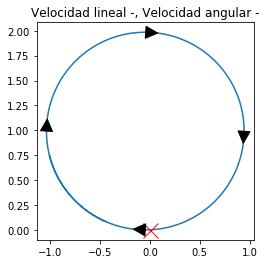

In [18]:
data = pd.read_csv("./logs/comb4_log.txt", sep= "\t", header=None) 
print("Registro de datos de camino circular - Comb4") 
#Elimino los datos que sean nulos (para graficar)

PuntosX = [x for x in data[1] if x != 0] 
PuntosY = [y for y in data[2] if y != 0]

#Grafico el camino circular con relacion 1:1 
#plt.axes().set_aspect('equal')
ax1 = plt.gca()
ax1.set_aspect('equal')
plt.plot(PuntosX,PuntosY) 
plt.title("Velocidad lineal -, Velocidad angular -")


#Calculo los 4 puntos de coseno y seno maximo 
puntos = [] 
puntos.append(PuntosX.index(max(PuntosX)))
puntos.append(PuntosX.index(min(PuntosX)))
puntos.append(PuntosY.index(max(PuntosY)))
puntos.append(PuntosY.index(min(PuntosY)))

#Grafico la direccion solo en esos puntos 
#La dirección la grafico como una flecha desde el punto i hasta el 
#punto i+1. 
plt.plot(0,0,marker = 'x',color = 'red',markersize = 15)
for indice in puntos: 
     plt.annotate('', xy=(PuntosX[indice+20], PuntosY[indice+20]), 
            xytext=(PuntosX[indice], PuntosY[indice]),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')

plt.savefig('./imgs/direccion_camino_circular_4.png')


In [2]:
Comb1 = plt.imread("./imgs/direccion_camino_circular_1.png")
Comb2 = plt.imread("./imgs/direccion_camino_circular_2.png")
Comb3 = plt.imread("./imgs/direccion_camino_circular_3.png")
Comb4 = plt.imread("./imgs/direccion_camino_circular_4.png")

fig = plt.figure(1,(20,20))
fig.add_subplot(2, 2,1)
plt.imshow(Comb1)
plt.axis("off")
fig.add_subplot(2,2,2)
plt.imshow(Comb2)
plt.axis("off")
fig.add_subplot(2,2,3)
plt.imshow(Comb3)
plt.axis("off")
fig.add_subplot(2,2,4)
plt.imshow(Comb4)
plt.axis("off")



NameError: name 'plt' is not defined

## Comparación de gráficas de orientación 

    Gráficas de las diferentes combinaciones de signos de velocidades con sus respectivas gráficas de orientación, con los mismos puntos marcados 

In [43]:
def graficar_camino(data,titulo): 
    PuntosX = [x for x in data[1] if x != 0] 
    PuntosY = [y for y in data[2] if y != 0]
   

    ax1 = plt.gca()
    ax1.set_aspect('equal')
    plt.plot(PuntosX,PuntosY) 
    plt.title(titulo)



    puntos = [] 
    puntos.append(PuntosX.index(max(PuntosX)))
    puntos.append(PuntosX.index(min(PuntosX)))
    puntos.append(PuntosY.index(max(PuntosY)))
    puntos.append(PuntosY.index(min(PuntosY)))

    markerList = ["o","*","x","s"]
    for i,indice in enumerate(puntos):   
        plt.plot(PuntosX[indice],PuntosY[indice],marker = markerList[i], markersize = 15)
            
            
def  graficar_orientacion(data,titulo): 
    PuntosO = [o for o in data[3] if o != 0] 
    PuntosT = [t for t in data[0] if t!= 0]
    PuntosX = [x for x in data[1] if x != 0] 
    PuntosY = [y for y in data[2] if y != 0]

   
    plt.plot(PuntosT,PuntosO) 
    plt.title(titulo)


    markerList = ["o","*","x","s"]
    puntos = [] 
    puntos.append(PuntosX.index(max(PuntosX)))
    puntos.append(PuntosX.index(min(PuntosX)))
    puntos.append(PuntosY.index(max(PuntosY)))
    puntos.append(PuntosY.index(min(PuntosY)))
   
#     for indice in puntos: 
#          plt.annotate('', xy=(PuntosT[indice+20], PuntosO[indice+20]), 
#             xytext=(PuntosT[indice], PuntosO[indice]),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top')


    for i,indice in enumerate(puntos):   
        plt.plot(PuntosT[indice],PuntosO[indice],marker = markerList[i], markersize = 15)


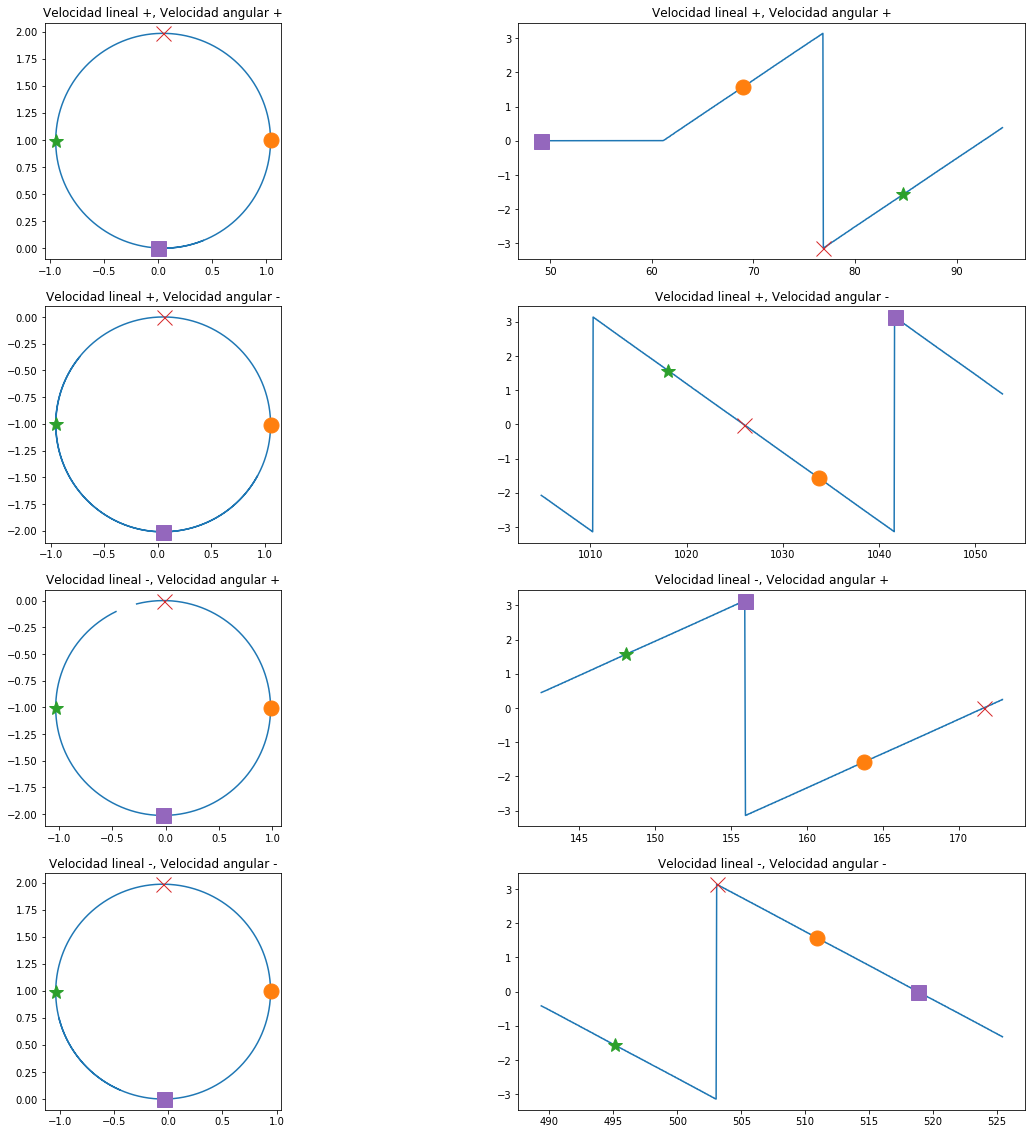

In [47]:
import pandas as pd  
import matplotlib.pylab as plt 

dataC1 =  pd.read_csv("./logs/log_mov_circular.txt", sep= "\t", header=None) 
dataC2 =  pd.read_csv("./logs/comb2_log.txt", sep= "\t", header=None) 
dataC3 =  pd.read_csv("./logs/comb3_log.txt", sep= "\t", header=None) 
dataC4 =  pd.read_csv("./logs/comb4_log.txt", sep= "\t", header=None) 


fig = plt.figure(1,(20,20))
fig.add_subplot(4, 2,1)
graficar_camino(dataC1,"Velocidad lineal +, Velocidad angular +")
fig.add_subplot(4, 2,2)
graficar_orientacion(dataC1,"Velocidad lineal +, Velocidad angular +")

fig.add_subplot(4,2,3)
graficar_camino(dataC2,"Velocidad lineal +, Velocidad angular -")
fig.add_subplot(4, 2,4)
graficar_orientacion(dataC2,"Velocidad lineal +, Velocidad angular -")


fig.add_subplot(4,2,5)
graficar_camino(dataC3,"Velocidad lineal -, Velocidad angular +")
fig.add_subplot(4, 2,6)
graficar_orientacion(dataC3,"Velocidad lineal -, Velocidad angular +")


fig.add_subplot(4,2,7)
graficar_camino(dataC4,"Velocidad lineal -, Velocidad angular -")
fig.add_subplot(4, 2,8)
graficar_orientacion(dataC4,"Velocidad lineal -, Velocidad angular -")


plt.savefig("./imgs/comparacion_combinaciones.png")